# Проект: Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sbn


df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
# Выводим первые 5 строчек датафрейма
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Выводим основную информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Уточняем количество явных дубликатов
df.duplicated().sum()

0

In [5]:
# Посмотрим статистические характеристики данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


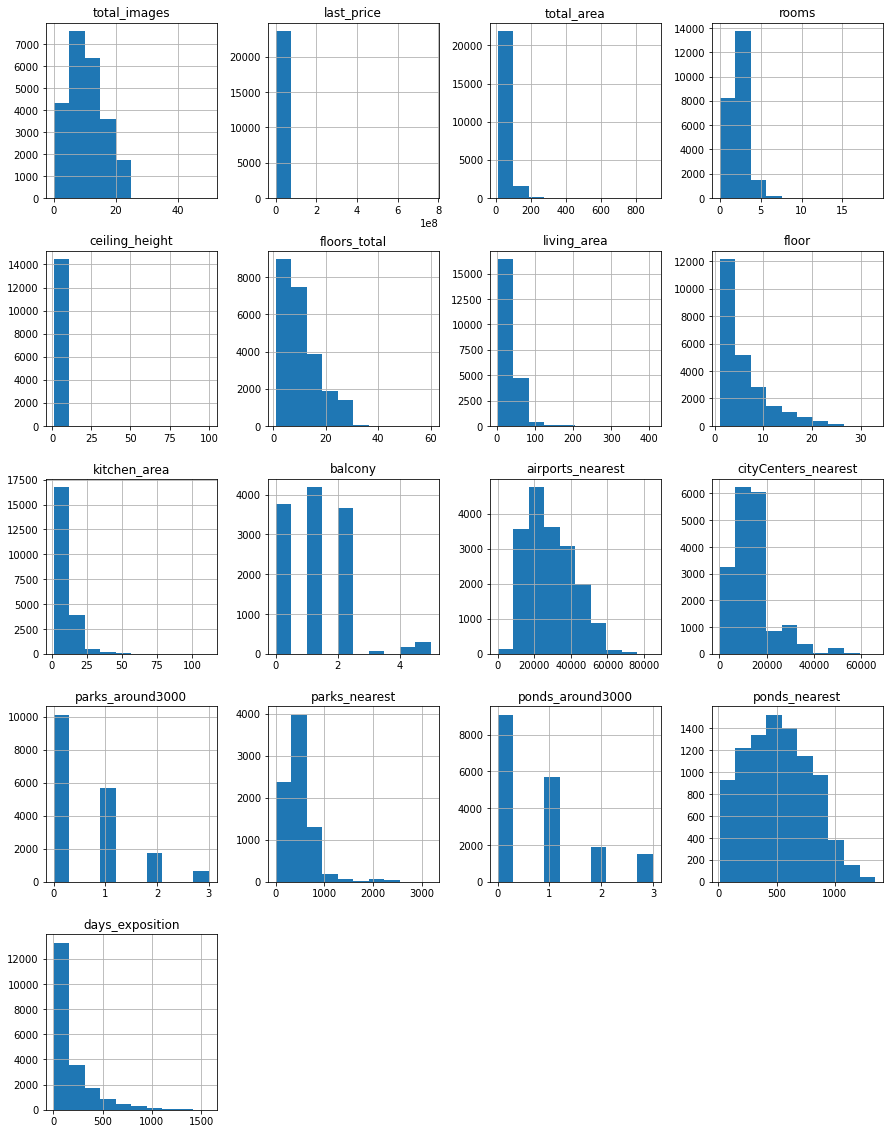

In [6]:
# Построим гистограммы
df.hist(figsize=(15, 20));

# Вывод:
В данных 23699 записи в 22 столбцах. Для целого ряда столбцов присутствуют пропущенные значения и некорректный тип данных. 
3 столбца - с целочисленными данными (тип < int >), 14 столбцов - с числовыми данными типа < float >, 
3 столбца типа < object > и 2 столбца с булевым типом (тип < bool >). 
Разберём, какие в таблице столбцы и какую информацию содержат:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

В столбцах floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition тип данных должны быть целочисленными, 
is_apartment - булевым, а first_day_exposition - тип даты и времени.
По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют.
Данных достаточно для исследования.

### Выполните предобработку данных

In [7]:
# Смотрим пропущенные значения
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# Измененим формат вывода даты и времени по столбцу first_day_exposition
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
# Поменяем в целочисленный тип стоимость квартиры
df['last_price'] = df['last_price'].astype(int)

In [10]:
# Поменяем наименование столбцов в однотипный формат
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_threekm', 'ponds_around3000':'ponds_around_threekm'}, inplace=True)

In [11]:
# Посмотрим среднее значение
df['is_apartment'].mean()

0.018018018018018018

In [12]:
# Посмотрим соотношение аппартаментов и не аппартаментов
df.groupby('is_apartment', as_index=False).agg({'rooms':'count'})

,is_apartment,rooms
0,False,2725
1,True,50


In [13]:
# Заменим пропущенные значения на Нет, так как - тут скорее всего указывают студию/не для продажи
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['is_apartment'] = df['is_apartment'].astype(bool)

In [14]:
# Поменяем в целочисленный тип количество балконов. Заменим пропущенные значения на 0
df['balcony'] = df['balcony'].fillna(value=0).astype(int)

In [15]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_threekm,parks_nearest,ponds_around_threekm,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [16]:
# Удаляем записи, где отсутствует локация и этажность
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)

In [17]:
# Заменим пустые значения высоты потолков на средние значение
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())

In [18]:
df['ceiling_height'].sort_values(ascending=False).head(10)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
20478     27.0
10773     27.0
4876      27.0
22938     27.0
21824     27.0
5246      27.0
Name: ceiling_height, dtype: float64

In [19]:
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10

In [20]:
# Приводим этажность к целочисленному типу
df['floors_total'] = df['floors_total'].astype(int)

In [21]:
# Заменим пустые значения жилой площади, площади кухни и общей площади, приведем к целочисленному типу
living_ratio = df['living_area'].mean() / df['total_area'].mean()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)
df['living_area'] = df['living_area'].astype(int)
df['kitchen_area'] = df['kitchen_area'].astype(int)
df['total_area'] = df['total_area'].astype(int)

In [22]:
# Проверим столбец "locality_name" на предмет уникальных значений
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [23]:
# Приведём значения к нижнему регистру для избавления от дубликатов
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'].duplicated().sum()

23201

In [24]:
# Избавимся от дубликатов и заменим поселок на посёлок
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок')
df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

In [25]:
# расстояние до ближайшего аэропорта (м)
df['airports_nearest'].round(2)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23565, dtype: float64

Скорее всего незаполненные пропуски указывают, что аэропорта либо нет в данном городе, либо он находится далеко.
Оставим как есть.

In [26]:
# расстояние до центра города (м)
df['city_centers_nearest'].round(2)

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23565, dtype: float64

Тут тоже скорее всего незаполненные пропуски указывают, что объект продажи находится за чертой города.
Оставим как есть.

In [27]:
# количество парков в радиусе 3 км
df['parks_around_threekm'].round(1)

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: parks_around_threekm, Length: 23565, dtype: float64

В основном парки указаны.
Незаполненные пропуски скорее всего указывают, что парков в радиусе 3км нет.
Оставим как есть.

поправил

In [28]:
# Поменяем в целочисленный тип количество парков. Заменим пропущенные значения на 0
df['parks_around_threekm'] = df['parks_around_threekm'].fillna(value=0).astype(int)

In [29]:
# количество водоемов в радиусе 3 км
df['ponds_around_threekm'].round(2)

0        2.0
1        0.0
2        2.0
3        3.0
4        1.0
        ... 
23694    3.0
23695    NaN
23696    NaN
23697    3.0
23698    NaN
Name: ponds_around_threekm, Length: 23565, dtype: float64

Тут тоже скорее всего, указывают, что в основном объект продажи находится недалеко от водоема, а незаполненные пропуски скорее всего указывают, что водоемов в радиусе 3км нет.
Оставим как есть.

In [30]:
# Поменяем в целочисленный тип количество прудов. Заменим пропущенные значения на 0
df['ponds_around_threekm'] = df['ponds_around_threekm'].fillna(value=0).astype(int)

In [31]:
# Смотрим пропущенные значения
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_threekm        0
parks_nearest           15535
ponds_around_threekm        0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  int64         
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  int64         
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  int64         
 13  balcony         

#### Вывод:

В процессе предобработки данных:
изменен формат даты на более удобный, в столбцах установлен корректный тип данных, устранены неявные дубликаты в названиях населенного пункта. 
Уменьшено количество пропусков в таблице. 
Возможные причины ввода некорректных данных: человеческий фактор (из за невнимательности забыл сохранить/добавить/перенести, а может просто скрыл информацию), возможно произошел сбой в программе или сломалась техника.

### Добавляем столбцы в таблицу

In [33]:
# Добавляем столбец со стоимостью квадратного метра (square_meter_price) и приводим его в целочисленный тип
df['square_meter_price'] = df['last_price'] / df['total_area']
df['square_meter_price'] = df['square_meter_price'].astype(int)

In [34]:
# Посмотрим результат
df['square_meter_price'].mean().round(1)

99856.8

In [35]:
# Добавляем столбец с соотношением жилой площади к общей в % (ratio_area) и приводим его в целочисленный тип
df['ratio_area'] = df['living_area'] / df['total_area'] * 100
df['ratio_area'] = df['ratio_area'].fillna(value=0).astype(int)

In [36]:
# Посмотрим результат
df['ratio_area'].mean().round(1)

55.8

In [37]:
# Добавляем столбцы дня недели, месяца и года
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [38]:
# Добавляем столбец с соотношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] * 100
df['kitchen_ratio'] = df['kitchen_ratio'].fillna(value=0).astype(int)

In [39]:
# Добавляем функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_group, axis=1)

In [40]:
# Посмотрим предпочтения по этажам
df['floor_type'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floor_type, dtype: int64

In [41]:
# Расстояние до центра города в км
df['distance_city_center'] = round(df['city_centers_nearest'] / 1000)
try:
    df['distance_city_center'] =  df['distance_city_center'].astype('Int32')
    print('distance_city_center ok')
except:
    print('city_centers_nearest_km Int32 type conversion fail')

distance_city_center ok


In [42]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,ratio_area,weekday,month,year,kitchen_ratio,floor_type,distance_city_center
0,20,13000000,108,2019-03-07,3,2.700000,16,51,8,False,...,755.0,NaN,120370,47,3,3,2019,23,другой,16
1,7,3350000,40,2018-12-04,1,2.771283,11,18,1,False,...,NaN,81.0,83750,45,1,12,2018,27,первый,19
2,10,5196000,56,2015-08-20,2,2.771283,5,34,4,False,...,574.0,558.0,92785,60,3,8,2015,14,другой,14
3,0,64900000,159,2015-07-24,3,2.771283,14,90,9,False,...,234.0,424.0,408176,56,4,7,2015,16,другой,7
4,2,10000000,100,2018-06-19,2,3.030000,14,32,13,False,...,48.0,121.0,100000,32,1,6,2018,41,другой,8
5,10,2890000,30,2018-09-10,1,2.771283,12,14,5,False,...,NaN,55.0,96333,46,0,9,2018,30,другой,<NA>
6,6,3700000,37,2017-11-02,1,2.771283,26,10,6,False,...,NaN,155.0,100000,27,3,11,2017,37,другой,19
7,5,7915000,71,2019-04-18,2,2.771283,24,40,22,False,...,NaN,NaN,111478,56,3,4,2019,25,другой,12
8,20,2900000,33,2018-05-23,1,2.771283,27,15,26,False,...,NaN,189.0,87878,45,2,5,2018,24,другой,<NA>
9,18,5400000,61,2017-02-26,3,2.500000,9,43,7,False,...,NaN,289.0,88524,70,6,2,2017,9,другой,15


#### Вывод
Добавил сболбцы для отображения корректных данных: square_meter_price (стоимость квадратного метра); ratio_area (соотношение жилой площади к общей площади); kitchen_ratio (соотношение площади кухни к общей площади); weekday, month, year (день недели, месяц, год); distance_city_center (Расстояние до центра города в км). 
Судя по количеству предложений, более актуальны квартиры на любом этаже кроме первого и последнего.

### Проведите исследовательский анализ данных

In [43]:
# Исследуем общую площадь
df['total_area'].describe()

count    23565.000000
mean        60.095226
std         35.668758
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

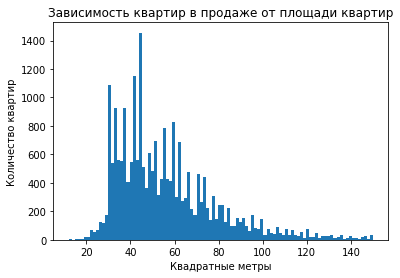

In [44]:
# Построим гистограмму
plt.hist(df['total_area'], bins=100, range=(12,150))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Большинство предложений квартир с общей площадью от 28 до 62 кв

In [45]:
# Исследуем жилую площадь
df['living_area'].describe()

count    23565.000000
mean        34.323446
std         22.374785
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        409.000000
Name: living_area, dtype: float64

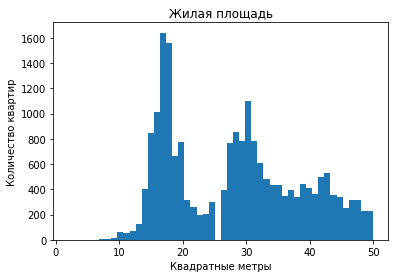

In [46]:
# Построим гистограмму
plt.hist(df['living_area'], bins=50, range=(2,50))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

В приоритете квартиры с жилой площадью 17-18 кв/м и 30 кв/м, при этом прослеживается спад предложений в средней зоне 26 кв/м.

In [47]:
# Исследуем площадь кухни
df['kitchen_area'].describe()

count    23565.000000
mean        10.228390
std          6.051268
min          1.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

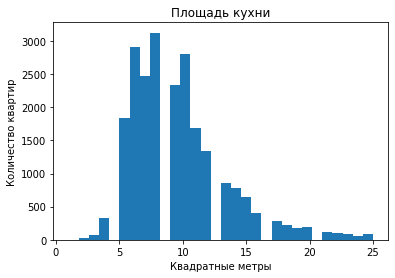

In [48]:
# Построим гистограмму
plt.hist(df['kitchen_area'], bins=30, range=(1,25))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Наблюдается тенденция, что самые распространённые квартиры с кухней - от 5 до 15 метров.

In [49]:
# Исследуем цену
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

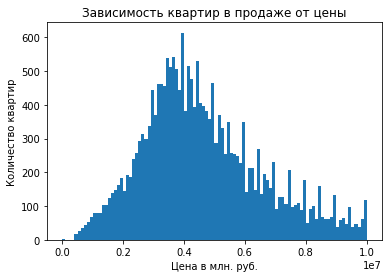

In [50]:
# Построим гистограмму
plt.hist(df['last_price'], bins=100, range=(1.219000e+04,10000000))
plt.title('Зависимость квартир в продаже от цены')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

По гисторгамме видно, наиболее частая цена квартиры от 3,5 - 4,5 миллниона.

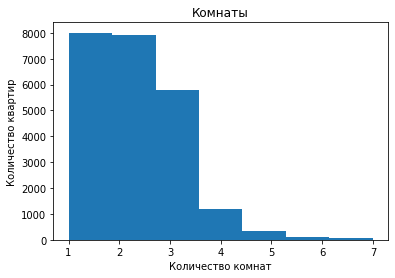

In [51]:
# Исследуем количество комнат
plt.hist(df['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

В продаже преобладают однокомнатные и двухкомнатные квартиры, далее следуют трехкомнатные квартиры.

In [52]:
# Исследуем высоту потолков
df['ceiling_height'].describe()

count    23565.000000
mean         2.745499
std          0.251504
min          1.000000
25%          2.600000
50%          2.771283
75%          2.771283
max         14.000000
Name: ceiling_height, dtype: float64

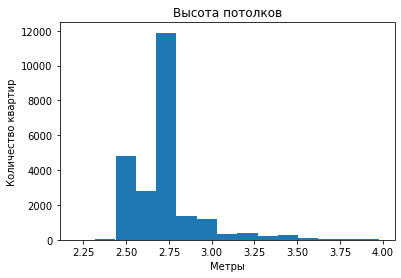

In [53]:
# Построим гистограмму
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=15)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра.

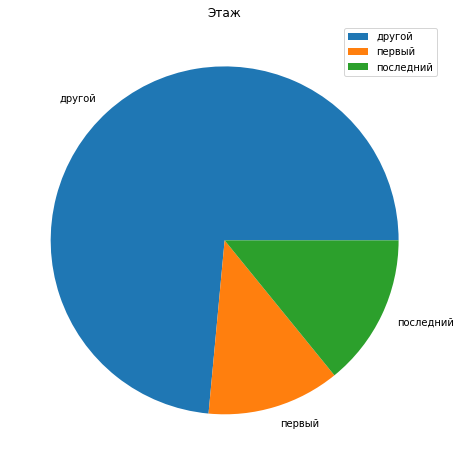

In [54]:
# Исследуем типы этажей
df.pivot_table(index='floor_type',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(8,8), label='', title='Этаж')
plt.show()

In [55]:
# Исследуем общее количество этажей в доме
df['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

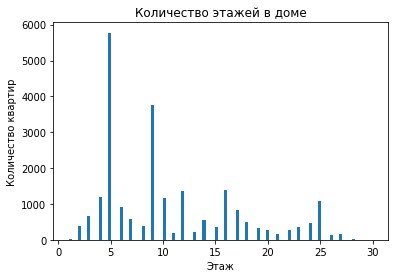

In [56]:
plt.hist(df['floors_total'], bins=100, range=(1,30))
plt.title('Количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме видно - преобладают пятиэтажные и девятитажные дома.

In [57]:
# Исследум расстояние до центра города в метрах
df['city_centers_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

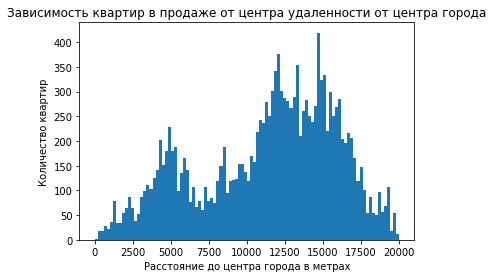

In [58]:
plt.hist(df['city_centers_nearest'], bins=100, range=(0,20000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()

Больше всего предложений о продаже на окраинах города: на расстоянии 12000 - 15000 метров и значительным всплеском на расстоянии в 4000 - 5000 метров от центра города.

In [59]:
# Исследуем расстояние до ближайшего парка
df['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

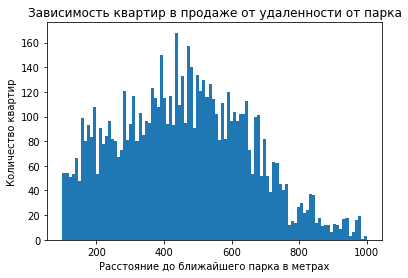

In [60]:
plt.hist(df['parks_nearest'], bins=100, range=(100,1000))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.ylabel('Количество квартир')
plt.show()

Как видим, зависимость квартир в продаже от удаленности от парка присутствует, среднее расстояние до парка составляет 500м.

In [61]:
## Исследуем как быстро продавались квартиры  
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

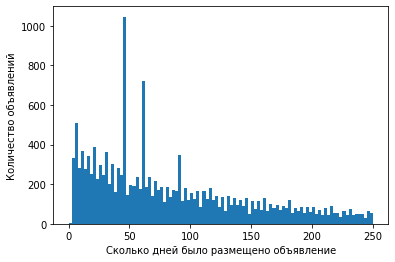

In [62]:
plt.hist(df['days_exposition'], bins=100, range=(0,250))
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

Среднее значение продажи составляет 180 дней, при этом медианное значение составляет 95 дней, оно более точно характеризует  время продажи, так как не зависит от выбрасов и нестандартных значений.

Наиболее быстрыми продажами можно считать которые продались за 45 дней, а долгие продажи после 200 дней и более.

#### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [63]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_threekm', 'parks_nearest', 'ponds_around_threekm',
       'ponds_nearest', 'days_exposition', 'square_meter_price', 'ratio_area',
       'weekday', 'month', 'year', 'kitchen_ratio', 'floor_type',
       'distance_city_center'],
      dtype='object')

In [64]:
# Иccледуем зависимость цены last_price от столбцов с числовыми данными при помощи вычисления корреляции:
df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr()

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.316907,0.125290,0.137224,0.438929
last_price,0.316907,1.000000,0.626934,0.442934,0.738760
living_area,0.125290,0.626934,1.000000,0.896363,0.918880
rooms,0.137224,0.442934,0.896363,1.000000,0.810785
total_area,0.438929,0.738760,0.918880,0.810785,1.000000


По корреляции наблюдаем прямой зависимости среди данных нет. Возможно повлияли редкие и выбивающиеся значения.

In [65]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

In [66]:
# Столбцы с выбросами
new_list = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height' ]
for col in new_list:
    df[col] = quartile_range(df, col)

In [67]:
df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr()

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.453201,-0.185414,-0.225620,0.275127
last_price,0.453201,1.000000,0.729873,0.550944,0.906611
living_area,-0.185414,0.729873,1.000000,0.892870,0.915240
rooms,-0.225620,0.550944,0.892870,1.000000,0.784065
total_area,0.275127,0.906611,0.915240,0.784065,1.000000


Значения c отброшенными значениями на основе 1.5 размаха стали лучше.

Прослеживается почти прямая зависимость между: ценой и общей площадью, ценой и количеством комнат.

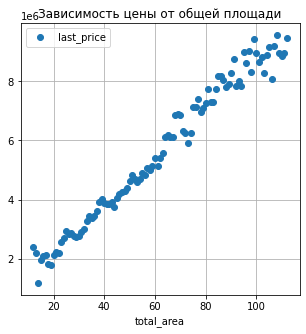

In [68]:
(df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5)))
plt.title('Зависимость цены от общей площади')
plt.show()

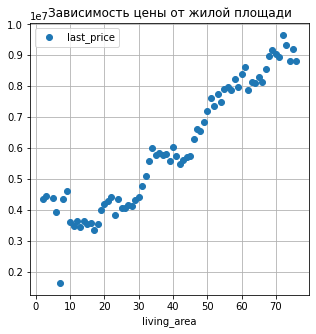

In [69]:
(df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5)))
plt.title('Зависимость цены от жилой площади')
plt.show()

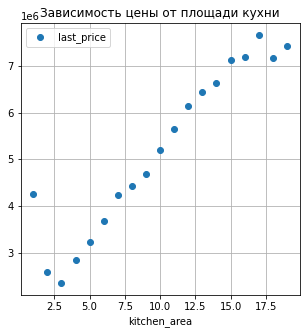

In [70]:
(df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5)))
plt.title('Зависимость цены от площади кухни')
plt.show()

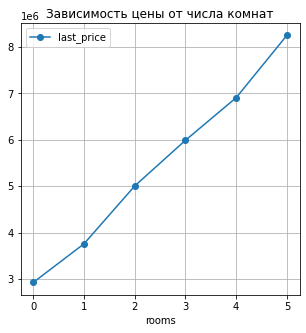

In [71]:
(df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5)))
plt.title('Зависимость цены от числа комнат')
plt.show()

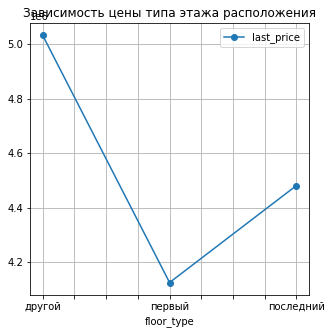

In [72]:
(df.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5)))
plt.title('Зависимость цены типа этажа расположения')
plt.show()

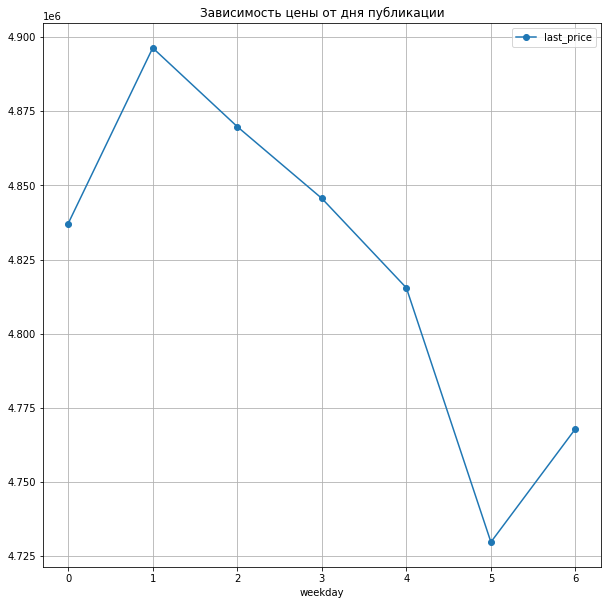

In [73]:
(df.pivot_table(index=('weekday'), values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 10)))
plt.title('Зависимость цены от дня публикации')
plt.show()

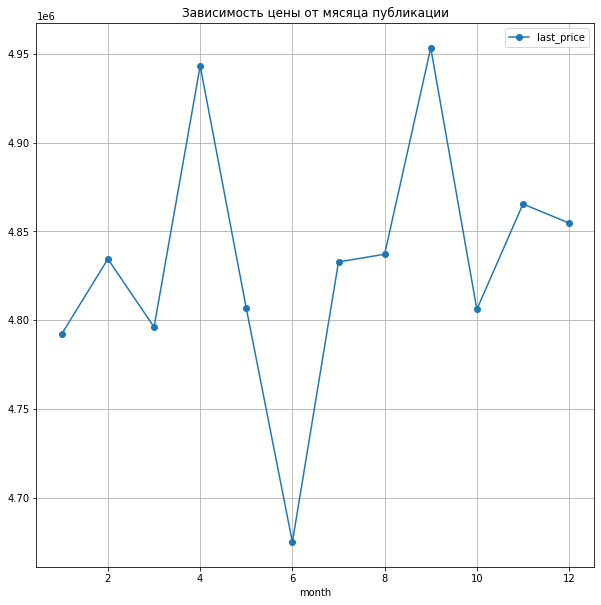

In [74]:
(df.pivot_table(index=('month'), values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 10)))
plt.title('Зависимость цены от мясяца публикации')
plt.show()

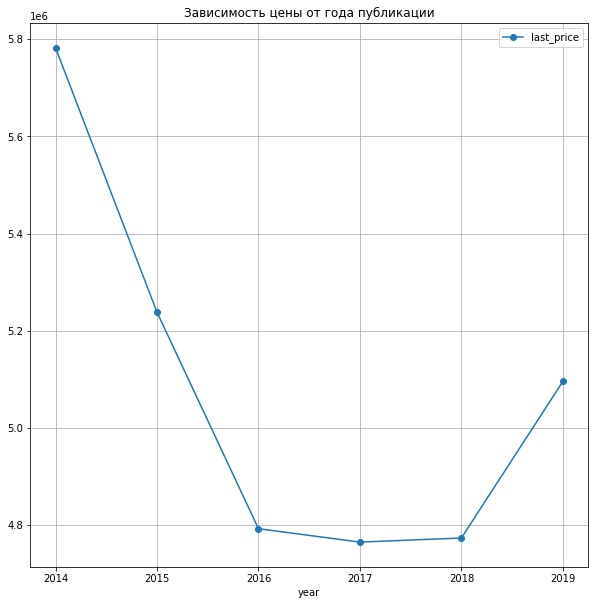

In [75]:
(df.pivot_table(index=('year'), values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 10)))
plt.title('Зависимость цены от года публикации')
plt.show()

Вывод:
Чем больше общая площадь, тем выше стоимость.

Число комнат тоже влияет на стоимость. Хоть и зависимость у них ниже, чем у площади, потому что бывают квартиры с большими по площади комнатами и квартиры в центре города 
которые стоят достаточно дорого.

Первый этаж влияет на стоимость квартиры - в среднем, квартиры на первом этаже продаются дешевле.

Чуть дороже последний этаж.

Наибольшая стоимость квартир расположенных не на первом и не на последнем этаже.

Объявления, размещённые до четверга имеют большую цену, чем в другие дни недели. 

На графике помесячного размещения объявлений хорошо просматриваются два падения - это середина и конец года,
в эти месяцы лучше квартиры не продавать, т.к. средняя стоимость ранка будет ниже чем в другие месяцы.

По годовой тенденции наблюдается падение в стоимости жилья в 2014-2016 годах и резкий взлёт стоимости начиная с 2018 года, 
скорей всего это вызвано большим спросом на рынке недвижимости.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [76]:
df_10 = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
df_10.columns = ['count']
df_10 = df_10.sort_values(by='count', ascending=False).head(10)
df_10['square_meter_price'] = df.pivot_table(index='locality_name', values='square_meter_price').round(2)
df_10.sort_values(by='square_meter_price', ascending=False)

,count,square_meter_price
locality_name,,
санкт-петербург,13676,115365.71
пушкин,338,103610.95
деревня кудрово,298,93001.74
посёлок парголово,327,90675.24
посёлок мурино,552,86253.83
посёлок шушары,439,78943.06
колпино,336,75735.15
гатчина,305,69045.07
всеволожск,397,68984.80


Ожидаемо самая дорогая недвижимость в Санкт-Петербурге, а сама низкая в Выборге из 10 по количеству объявлений.
По средней стоимости за кв.м. жилья, можно сказать, что низкое количество объявлений не сильно влияет на цену кв.метра, например деревня кудрово и посёлок парголово имеют практически ту же цену в 90 т.р. за кв. метр.

In [77]:
# Вычислим среднюю стоимость на разном удалении от центра
df.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    15591.000000
mean        11.583414
std          4.854068
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

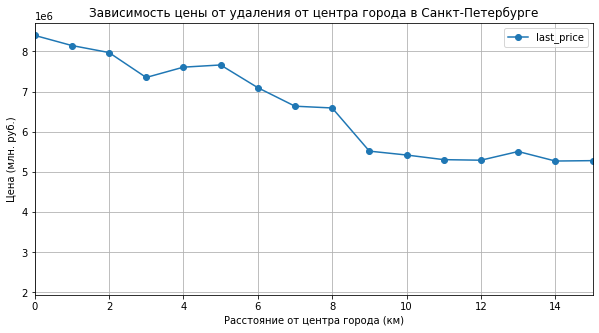

,last_price
distance_city_center,
0,8.398000e+06
1,8.145277e+06
2,7.970519e+06
3,7.350003e+06
4,7.606618e+06
5,7.661225e+06
6,7.096569e+06
7,6.635321e+06
8,6.591220e+06


In [78]:
(df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5)))
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (км)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
df.query('locality_name == "санкт-петербург" and distance_city_center<15').pivot_table(values='last_price', index='distance_city_center')

Как видим, самые дорогие квартиры в центре города, далее стоимость уменьшается c увеличением расстояния от центра города до 8 км, далее стоимость не зависит от удаления.

### Напишите общий вывод

В процессе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы.

#### Изучили общую информацию:

В данных 23699 записи в 22 столбцах. Для целого ряда столбцов присутствуют пропущенные значения и некорректный тип данных.

3 столбца - с целочисленными данными (тип < int >), 14 столбцов - с числовыми данными типа < float >, 
3 столбца типа < object > и 2 столбца с булевым типом (тип < bool >).

В столбцах floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition тип данных должны быть целочисленными, 
is_apartment - булевым, а first_day_exposition - тип даты и времени.

По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют.


#### Выполнена предобработка данных:

Изменен формат даты на более удобный, в столбцах установлен корректный тип данных, устранены неявные дубликаты в названиях населенного пункта. Уменьшено количество пропусков в таблице. 

Возможные причины ввода некорректных данных: человеческий фактор (из за невнимательности забыл сохранить/добавить/перенести, а может просто скрыл информацию), возможно произошел сбой в программе или сломалась техника.

Добавили сболбцы для отображения корректных данных:

square_meter_price (стоимость квадратного метра); 

ratio_area (соотношение жилой площади к общей площади); 

kitchen_ratio (соотношение площади кухни к общей площади);

weekday, month, year (день недели, месяц, год);

distance_city_center (Расстояние до центра города в км).

Судя по количеству предложений, более актуальны квартиры на любом этаже кроме первого и последнего.


#### Проведен исследовательский анализ данных:

Большинство предложений квартир с общей площадью от 28 до 62 кв

В приоритете квартиры с жилой площадью 17-18 кв/м и 30 кв/м, при этом прослеживается спад предложений в средней зоне 26 кв/м.

Наблюдается тенденция, что самые распространённые квартиры с кухней - от 5 до 15 метров.

Наиболее частая цена квартиры от 3,5 - 4,5 миллниона.

В продаже преобладают однокомнатные и двухкомнатные квартиры, далее следуют трехкомнатные квартиры.

Минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра.

Преобладают пятиэтажные и девятитажные дома.

Больше всего предложений о продаже на окраинах города: на расстоянии 12000 - 15000 метров и значительным всплеском на расстоянии в 4000 - 5000 метров от центра города.

Как видим, зависимость квартир в продаже от удаленности от парка присутствует, среднее расстояние до парка составляет 500м.

Среднее время продажи составляет 180 дней, при этом медианное значение составляет 95 дней, оно более точно характеризует время продажи, так как не зависит от выбрасов и нестандартных значений.

Наиболее быстрыми продажами можно считать которые продались за 45 дней, а долгие продажи после 200 дней и более.


Определили факторы, которые больше всего влияют на общую (полную) стоимость объекта:

Чем больше общая площадь, тем выше стоимость.

Число комнат тоже влияет на стоимость. Хоть и зависимость у них ниже, чем у площади, потому что бывают квартиры с большими по площади комнатами и квартиры в центре города которые стоят достаточно дорого.

Первый этаж влияет на стоимость квартиры - в среднем, квартиры на первом этаже продаются дешевле. Чуть дороже последний этаж.

Наибольшая стоимость квартир расположенных не на первом и не на последнем этаже.

Объявления размещённые до четверга, имеют большую цену, чем в другие дни недели.

На графике помесячного размещения объявлений хорошо просматриваются два падения - это середина и конец года, в эти месяцы лучше квартиры не продавать, т.к. средняя стоимость ранка будет ниже чем в другие месяцы.

По годовой тенденции наблюдается падение в стоимости жилья в 2014-2016 годах и резкий взлёт стоимости начиная с 2018 года, скорей всего это вызвано большим спросом на рынке недвижимости.


Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

Ожидаемо самая дорогая недвижимость в Санкт-Петербурге, а сама низкая в Выборге из 10 по количеству объявлений.
По средней стоимости за кв.м. жилья, можно сказать, что низкое количество объявлений не сильно влияет на цену кв.метра, например деревня кудрово и посёлок парголово имеют практически ту же цену в 90 т.р. за кв. метр.

Как видим, самые дорогие квартиры в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 8 км, далее стоимость не зависит от удаления.





